# Exploratory Data Analysis (EDA) - Metacritic Details

## 1. Introduction

### 1.1 About this document
In order to generate some kind of recommendation it's best to know as much about a video game as you can. Metacritic provides detailed descriptions about their games which we will be using as a source. After running a scraper over the website, I gathered all the games I could find on their website. In this document I write down all the findings that I was able to discover within this dataset.

### 1.2 Goal of this document
The goal of this document is to maximize the analytical insight we can gain of the underlying structure of the data. We look for potential trends, outliers and clusters present within the dataset that can help us to determine the possibilities, opportunities, limitations, and boundaries of the dataset.

## 2. Preperations

### 2.1 Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="darkgrid")

### 2.2 Importing the dataset

In [3]:
df = pd.read_json('../data/game_details.json')
df.head(3).append(df.tail(3))

,title,platform,publisher,publisher_page,developer,developer_page,release_date,genres,summary,thumbnail
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,Nintendo,/company/nintendo,Nintendo,/company/nintendo,"Nov 23, 1998","[Action Adventure, Fantasy]","As a young boy, Link is tricked by Ganondorf, ...",/9j/4AAQSkZJRgABAQEAZABkAAD/2wBDAAMCAgMCAgMDAw...
1,Tony Hawk's Pro Skater 2,PlayStation,Activision,/company/activision,Neversoft Entertainment,/company/neversoft-entertainment,"Sep 20, 2000","[Sports, Alternative, Skateboarding]",As most major publishers' development efforts ...,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAw...
2,Grand Theft Auto IV,PlayStation 3,Rockstar Games,/company/rockstar-games,Rockstar North,/company/rockstar-north,"Apr 29, 2008","[Action Adventure, Modern, Modern, Open-World]",[Metacritic's 2008 PS3 Game of the Year; Also ...,/9j/4AAQSkZJRgABAQEBLAEsAAD/2wBDAAMCAgMCAgMDAw...
18293,Cruis'n,Wii,Midway,/company/midway,Midway Studios - San Diego,/company/midway-studios---san-diego,"Nov 27, 2007","[Driving, Racing, Arcade, Arcade, Automobile]",An all new version of the classic Midway arcad...,/9j/4AAQSkZJRgABAQEBLAEsAAD/2wBDAAMCAgMCAgMDAw...
18294,NBA Unrivaled,PlayStation 3,Tecmo,/company/tecmo,A.C.R.O.N.Y.M. Games,/company/acronym-games,"Nov 12, 2009","[Sports, Traditional, Basketball, Arcade, Arcade]",[Playstation Network] Paying homage to the ol...,/9j/4AAQSkZJRgABAQEAZABkAAD/2wBDAAMCAgMCAgMDAw...
18295,Terrawars: New York Invasion,PC,Tri Synergy,/company/tri-synergy,Ladyluck Digital Media,/company/ladyluck-digital-media,"Jul 6, 2006","[Action, Shooter, Shooter, First-Person, Sci-F...","Without warning, the world is overrun by an al...",/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAMCAgMCAgMDAw...


### 2.3 Statistics of the dataset

In [4]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (18296, 10)


The dataset contains details for about 18.000 entries. At first glance I'd say that’s quite a lot but when you start thinking about games that are released on multiple platforms, I’d expect this number to drop down significantly. Let’s check what we have left after we've combined all the multi-platform releases.

In [5]:
df_titles = df.groupby(['title']).size().reset_index(name='count')
print(f"Number of titles: {len(df_titles.index)}")

Number of titles: 11975


A reduction of roughly 35% in the number of records, but still not a bad sum overall, reaching just below 12.000 unique games. Next up I'd like to know how many publishers and developers we have. If games are only provided by a single company, then it would still be a poor selection of games.

In [6]:
df_publishers = df.groupby(['publisher']).size().reset_index(name='count')
print(f"Number of publishers: {len(df_publishers.index)}")

df_developers = df.groupby(['developer']).size().reset_index(name='count')
print(f"Number of developers: {len(df_developers.index)}")

Number of publishers: 1870
Number of developers: 3676


That’s a lot more than I expected! I'd love to see the distribution of these!

<AxesSubplot:title={'center':'developers'}, xlabel='index'>

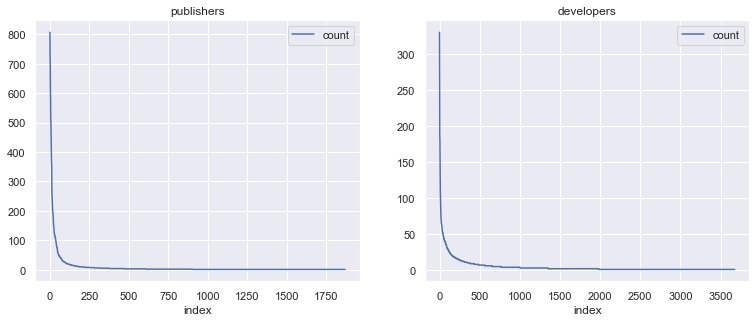

In [7]:
plt.figure(figsize=(12.8, 4.8))

plt.subplot(1,2,1)
plt.title('publishers')
df_publishers.sort_values(by='count', inplace=True, ascending=False)
df_publishers = df_publishers.reset_index(drop=True).reset_index()
df_publishers.plot(ax=plt.gca(), x='index', y='count')

plt.subplot(1,2,2)
plt.title('developers')
df_developers.sort_values(by='count', inplace=True, ascending=False)
df_developers = df_developers.reset_index(drop=True).reset_index()
df_developers.plot(ax=plt.gca(), x='index', y='count')

Those are some sharp angles, yikes. Looks like a lot of publishers only release a single game, which is a bit disappointing. This does make more sense to me though, as I can hardly name more publishers than I can count with my fingers. It is nice to see that the 20 or so publishers do provide a large sum of the games. Developers are slightly more diverse, but we can still see that the majority of developers made games in the single digits.

I'd also like to see what the timeframe is that we are looking at. If these games are just from last year or of go way back to the year 1950 makes a huge difference as well.

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', format='%b %d, %Y')
print(f"Recording started on: {min(df['release_date']).date()}")

Recording started on: 1995-04-30


Games go back to roughly 1995, which is around the time that 3D games were first in development. So the dataset seems to be lacking in games that predate this era.

### 2.4 Checking for null values
Next, let’s check for null values. Because the data has to be manually inserted by owners of the platform, they will most likely teach us about use-cases we might not have considered at first glance and gives us more insight in the origin of the data.

In [9]:
df.isnull().sum()

title               0
platform            0
publisher          12
publisher_page     12
developer          20
developer_page     20
release_date        1
genres              0
summary           128
thumbnail           0
dtype: int64

#### 2.4.1 Summaries
There are quite a few empty summaries in the dataset. First thing that I'd like to investigate is if there is a pattern in the date of release and the null values. Perhaps new titles are not fully documented yet, or older games are missing parts of their descriptions.

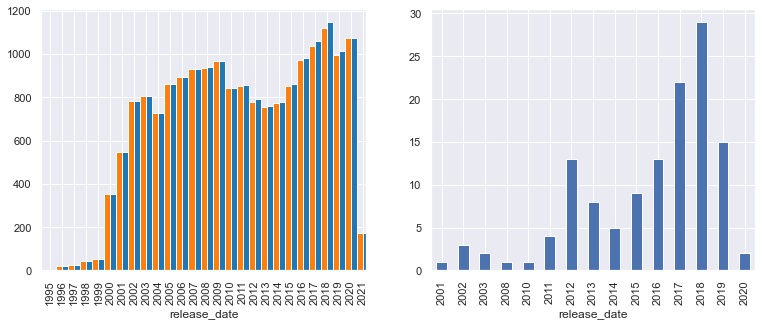

In [10]:
plt.figure(figsize=(12.8, 4.8))

df_year_size = df.groupby(df['release_date'].dt.year.astype('Int64')).size()
df_year_count = df.groupby(df['release_date'].dt.year.astype('Int64'))
df_year_count = df_year_count['summary'].count()

plt.subplot(1,2,1)
df_year_size.plot.bar(position = 0, color='tab:blue')
df_year_count.plot.bar(position = 1, color='tab:orange')

plt.subplot(1,2,2)
df_year_sum = df[df['summary'].isnull()].groupby(df['release_date'].dt.year.astype('Int64')).size()
df_year_sum.plot.bar()

plt.show()

Here we can see that from 2012 onwards, we start to see a noticable amount of games missing their summaries, but it was already happening in 2001. Something of note is that since the year 2001 the total number of games on the website has seen a drastic increase. I'd expect that the missing values have something to do with the actual maintenance of the articles due to the sheer amount of them.

### 2.5 Checking for duplicate values
Next, we can check for duplicate values. We don't want to have duplicate data present in the dataset as it would cause issues when trying to combine the dataset with new data. It's important that the combination of platform and game title is unique. The same game can't be released under the same name and platform twice.

In [11]:
print(f"Duplicates: {sum(df.duplicated(subset=['title', 'platform'], keep='first'))}")

Duplicates: 1


A single duplicate! Lets invesitage the differences in the other columns

In [12]:
df[df.duplicated(subset=['title', 'platform'], keep=False)]

,title,platform,publisher,publisher_page,developer,developer_page,release_date,genres,summary,thumbnail
5139,Star Wars Battlefront II,PC,Electronic Arts,/company/electronic-arts,EA DICE,/company/ea-dice,2017-11-17,"[Action, Shooter, First-Person, Tactical]",Star Wars Battlefront II allows players to exp...,/9j/4AAQSkZJRgABAQEAAQABAAD/2wBDAAMCAgMCAgMDAw...
13237,Star Wars Battlefront II,PC,Electronic Arts,/company/electronic-arts,EA DICE,/company/ea-dice,2017-11-17,"[Action, Shooter, First-Person, Tactical]",Star Wars Battlefront II allows players to exp...,/9j/4AAQSkZJRgABAQEAAQABAAD/2wBDAAMCAgMCAgMDAw...


They are the exact same, so we can safley remove one of them.

In [13]:
## Regular drop_duplicates doesn't work on columsn with lists
## See: https://stackoverflow.com/a/52198504

df = df.loc[df.astype(str).drop_duplicates().index]
print(f"Duplicates: {sum(df.duplicated(subset=['title', 'platform'], keep='first'))}")

Duplicates: 0


Genre consists of a list with all genres associated with that game. Unlike dictionaries and sets, lists have the attribute that they could contain the same value multiple times. This means a genre could occur multiple times. Let's count the number of times this is happening.

In [14]:
df_genres_dup = df['genres'].apply(lambda x: len(x) - len(set(x)))
print(f"Duplicate generes: {sum(df_genres_dup)}")

Duplicate generes: 10130


Seems like the website is pretty poorly maintained when it comes to genres to say the least. Luckily duplicate values like these could easily be resolved by throwing them into a set instead and converting it back into a list.

In [15]:
df['genres'] = df['genres'].apply(lambda x: list(set(x)))

In [16]:
df_genres_dup = df['genres'].apply(lambda x: len(x) - len(set(x)))
print(f"Duplicate generes: {sum(df_genres_dup)}")

Duplicate generes: 0


## 3. Data Analysis

## 3.1 What is the most popular genre to develop?
Publishers obviously want to capture the largest target audiences possible. Because of this is seems logical to me that they would want to develop for the most popular genres that are out there. This knowledge could be very useful when looking for recommendations for someone who doesn't have a big collection of games.

In [17]:
df_genres = df['genres'].explode().reset_index()
df_genres_count = df_genres.groupby('genres').size()

df_genres_count.sort_values(inplace=True, ascending=False)
print(f"Number of genres: {len(df_genres_count)}")

Number of genres: 169


<AxesSubplot:xlabel='genres'>

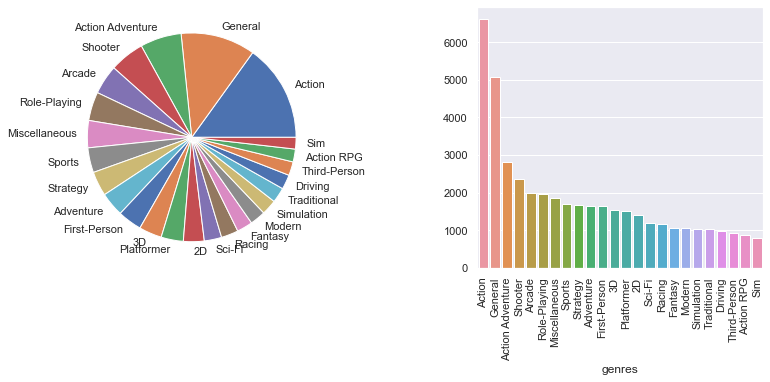

In [18]:
threshold = 750

df_genres_thresh = df_genres_count >= threshold
df_genres_thresh = df_genres_count[df_genres_thresh]

plt.figure(figsize=(12.8, 4.8))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
df_genres_thresh.plot.pie(ylabel='')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x=df_genres_thresh.index, y=df_genres_thresh)

Here we can see that action and "general" are the most popular genres to develop. However, general is not very descriptive about what it actually means. We also still see a lot of combinations of genres, like Action, Action Adventure and Action RPG, while Adventure also has its own category and Sim and Simulation should be the same, so the exact specifications of these categories are a bit vague. It's also funny to see arcade games so high up in the list. Guess they are still really popular among fans which is something I didn’t expect.

### 3.2 Which platforms get the most amount of games?
The next thing I want to double check is the distribution on all the platforms. This will determine how big the selection of games will be that we can recommend for people who own only a single platform.

<AxesSubplot:xlabel='platform'>

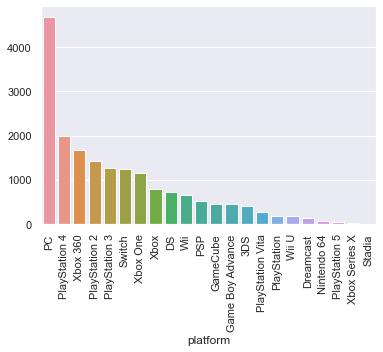

In [19]:
df_platforms = df.groupby(['platform']).size()
df_platforms.sort_values(inplace=True, ascending=False)

plt.xticks(rotation=90)
sns.barplot(x=df_platforms.index, y=df_platforms)

Here we can see a clear bias towards the PC platform, doubling over its closest contender, the PlayStation 4. This however makes sense when you take into consideration that the PC platform has been around for many years, whilst consoles often get hardware refreshes and being discontinued.

### 3.3 Who are the biggest publishers?

<AxesSubplot:xlabel='publisher', ylabel='Count'>

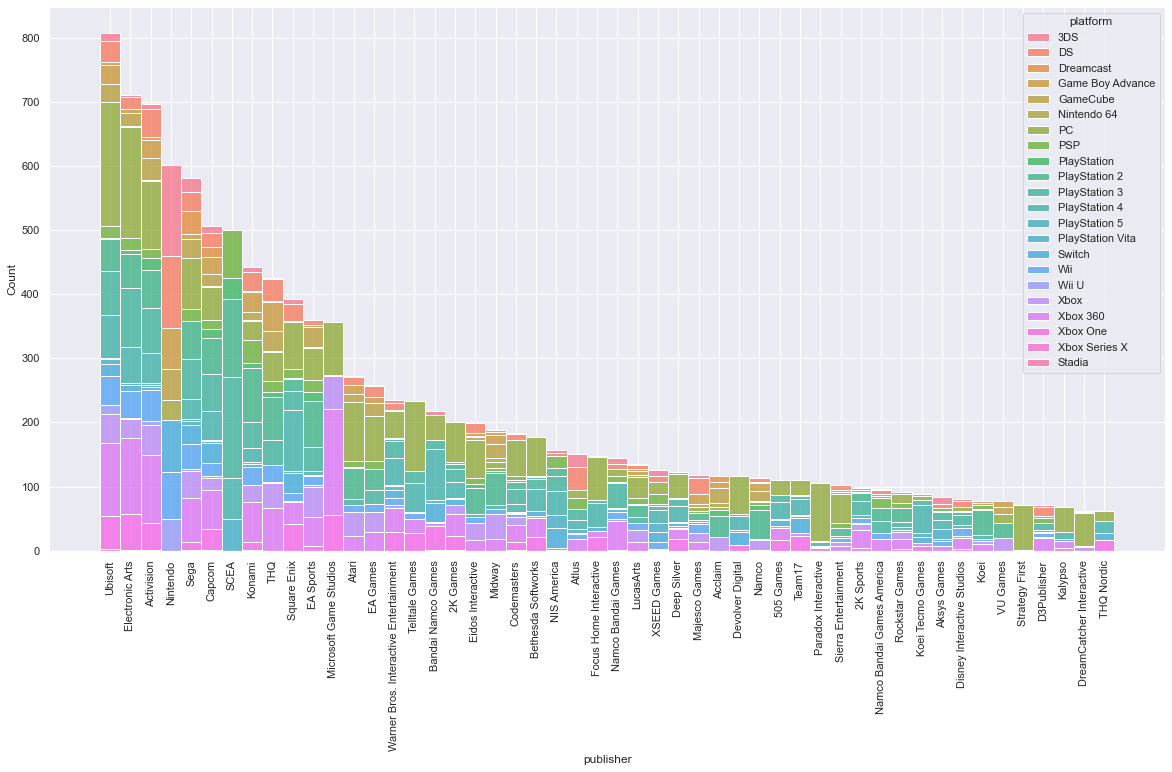

In [20]:
# Numbers of publishers to include in the histogram,
# orderd from most published games to least
number_of_publishers = 50

# Count the amount of games published by a publisher
top_publishers = df['publisher'].value_counts().index
top_publishers = top_publishers[:number_of_publishers]

# Apply filter on the number of publishers
df_publishers_releases = df[df['publisher'].isin(top_publishers)].copy()

# Order by rank so we have the largest publishers on the left of the graph
df_publishers_releases['rank'] = pd.Categorical(df_publishers_releases['publisher'], top_publishers)
df_publishers_releases.sort_values(by=['rank', 'platform'], inplace=True)

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

sns.histplot(df_publishers_releases, x='publisher', hue='platform', multiple='stack', bins=number_of_publishers)

Now we can clearly see the big names in the industry like Ubisoft, Electronic Arts, Activision, and Nintendo. Of all these publishers Nintendo is the only company (left) that only develops for their own platform, but I'm curious to see how the distribution is among the other publishers.

In [21]:
NINTENDO = [
    '3DS', 
    'DS', 
    'Game Boy Advance', 
    'GameCube', 
    'Nintendo 64', 
    'Switch', 
    'Wii', 
    'Wii U']

SONY = [
    'PSP', 
    'PlayStation', 
    'PlayStation 2', 
    'PlayStation 3', 
    'PlayStation 4', 
    'PlayStation 5', 
    'PlayStation Vita']

MICROSOFT = [
    'Xbox', 
    'Xbox360',
    'Xbox One', 
    'Xbox Series X']

In [22]:
df_publishers_releases['company'] = 'Other'
df_publishers_releases.loc[df_publishers_releases['platform'].isin(MICROSOFT), 'company'] = 'Microsoft'
df_publishers_releases.loc[df_publishers_releases['platform'].isin(NINTENDO), 'company'] = 'Nintendo'
df_publishers_releases.loc[df_publishers_releases['platform'].isin(SONY), 'company'] = 'Sony'

<AxesSubplot:xlabel='publisher', ylabel='Count'>

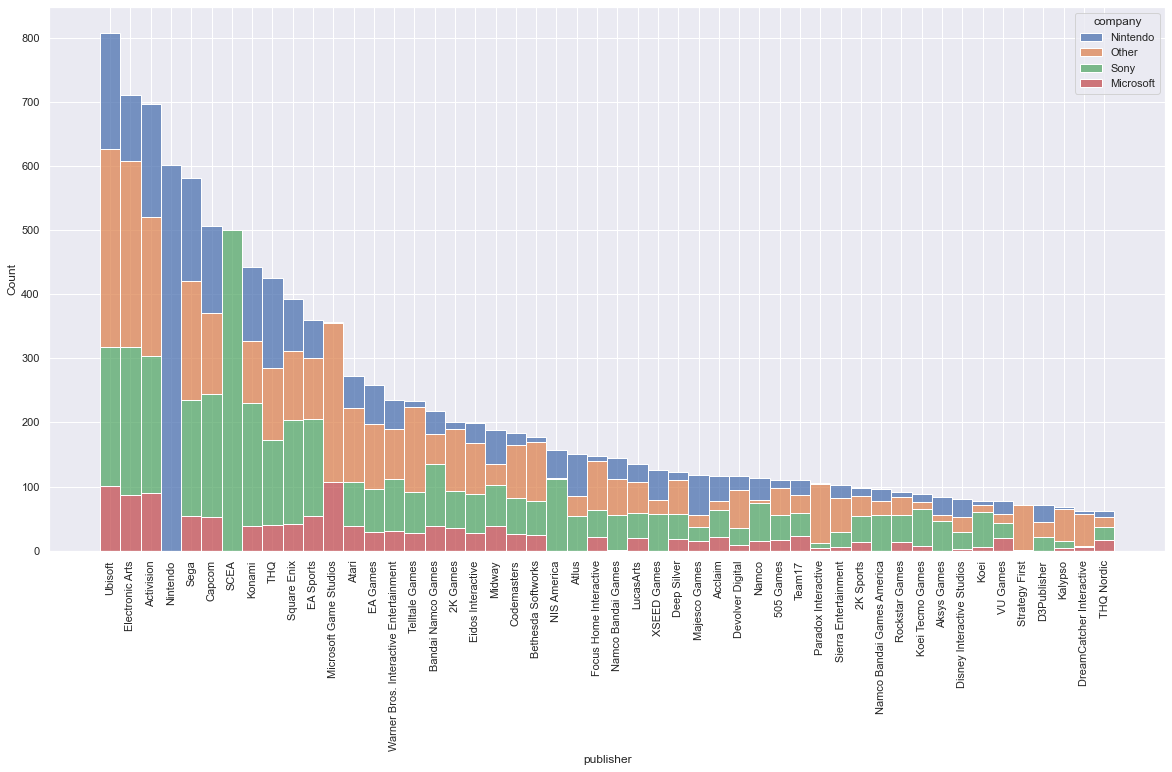

In [23]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

sns.histplot(df_publishers_releases, x='publisher', hue='company', multiple='stack', bins=number_of_publishers)

Looks like most of the big publishers (with exception of Nintendo, SCEA and Microsoft Game Studios) try to distribute their games on all platforms although Microsoft is getting the short end of the stick. For the somewhat smaller publishers, it looks like they tend to prefer Sony and PC with an occasional release on the Nintendo and Microsoft consoles.

## 4. Conclusion

For the statistics of the dataset, we've discovered that we have details of roughly 18.000 games. This number gets reduced to roughly 12.000 games when we discard the multi-platform releases. Furthermore, we have about 3.500 developers and 1.800 publishers. The games in the dataset go back to the year 1995, which is around the time that 3D games were first in developed, so the old classics are not registered.

After that, we've taken a look at the reason why some records don't provide a description/summary of the game. This is most likely due to the increase of the number of games after 2001, making it difficult to maintain the all the pages.

We've also checked for duplicate entries in the dataset, only containing one entry. However, when looking at the genres we see that there were a lot of duplicate entries in the list. Luckily, we were able to solve them pretty easily by converting the lists into a set.

Next up was the analysis itself. The most notable results were the following:
* Majority of the games have the action and general flags to them. It's not exclusive (meaning some games have multiple genres) but they were the most common one among all games. Some genres are kind of the same such as Role-Playing and RPG. This makes it difficult to categorize all the games unless we create a dictionary to manually map them to our own specification.
* PC has the most games, but for obvious reasons as it's been around the longest and doesn't get a refreshed model that replaces the previous generation whilst consoles do.
* Most of the big publishers distribute their games on all platforms (also known as a multi-platform release) with a select few publishers sticking to a single company. Smaller publishers prefer Sony and PC but are not exclusive to these platforms.

One way this dataset could have been expended upon is the inclusion of the director and producer of the game. They often adapt to their own philosophy when developing games which could contribute a lot when trying to look for good recommendations. Other than that, the dataset feels complete as is, if not a bit varying in quality.